### Explanation for the Sentiment Lexicon and Related Data Structures

This block of code defines a comprehensive **sentiment lexicon**, a collection of words assigned with **intensity scores** to be used for sentiment analysis. Each word in the lexicon is associated with a score reflecting the strength of the sentiment it conveys. Additionally, two other key components are included: **negation words** and **intensity modifiers**, which are essential for refining sentiment analysis. Here's a breakdown of the key components and their rationale:

#### 1. **Sentiment Lexicon (`SENTIMENT_LEXICON`)**
   - **Purpose**: The lexicon is used to assign sentiment scores to words based on their sentiment orientation. Each word is mapped to a score between -5 and +5, where positive values represent positive sentiment, and negative values represent negative sentiment. The magnitude of the score represents the intensity of the sentiment.
   
   - **Reasoning**: Using a predefined lexicon helps in determining the overall sentiment of a text based on individual word meanings. By associating words with scores, the algorithm can systematically assess whether the sentiment of a sentence or document is positive, negative, or neutral.

#### 2. **Negation Words (`NEGATION_WORDS`)**
   - **Purpose**: This set contains words that reverse the sentiment of the words they modify (e.g., "not," "can't," "won't").
   - **Reasoning**: Sentiment analysis models need to account for negations, as they can flip the polarity of a sentiment. For instance, "not good" should be interpreted as negative, even if "good" is a positive word in the lexicon.

#### 3. **Intensity Modifiers (`INTENSITY_MODIFIERS`)**
   - **Purpose**: These words alter the intensity of the sentiment of nearby words. Words like "very" and "extremely" increase the intensity of the sentiment, while words like "slightly" and "barely" reduce it.
   - **Reasoning**: Intensity modifiers allow for more nuanced sentiment analysis. For example, "very good" implies a stronger positive sentiment than just "good," and "barely acceptable" indicates a weak positive sentiment.

#### 4. **Stopwords (`STOPWORDS`)**
   - **Purpose**: The stopwords list contains common words (e.g., "and," "the," "is") that are often removed in natural language processing (NLP) tasks because they don't contribute significantly to sentiment analysis. 
   - **Reasoning**: Removing stopwords helps focus on the words that carry sentiment and meaning, improving the performance of the sentiment analysis. These words are generally neutral and don't help in determining sentiment polarity.

### Importance of Each Component:
- The **sentiment lexicon** is the core of the sentiment analysis process. It allows for the identification of individual word sentiments.
- **Negation words** and **intensity modifiers** provide a more sophisticated approach, allowing the model to understand context (e.g., negating a sentiment or intensifying it).
- **Stopwords** removal ensures that the algorithm focuses on the most meaningful terms, enhancing the efficiency and accuracy of the sentiment analysis process.



In [1]:
# Refined sentiment lexicon with intensity scores
SENTIMENT_LEXICON = {
    # Highly Positive Words (+4 to +5)
    "fantastic": 5, "amazing": 5, "brilliant": 5, "excellent": 5, "outstanding": 5,
    "phenomenal": 5, "remarkable": 5, "superb": 5, "wonderful": 5, "terrific": 5,
    "awesome": 4, "delightful": 4, "fabulous": 4, "glorious": 4, "incredible": 4,
    "marvelous": 4, "splendid": 4, "thrilling": 4, "unbelievable": 4, "exceptional": 4,

    # Moderately Positive Words (+2 to +3)
    "great": 3, "good": 3, "happy": 3, "joyful": 3, "positive": 3,
    "satisfying": 3, "enjoyable": 3, "pleasant": 3, "charming": 3, "heartwarming": 3,
    "admirable": 2, "appreciative": 2, "encouraging": 2, "favorable": 2, "hopeful": 2,
    "inspiring": 2, "promising": 2, "rewarding": 2, "uplifting": 2, "valuable": 2,

    # Slightly Positive Words (+1)
    "adequate": 1, "acceptable": 1, "decent": 1, "fine": 1, "okay": 1,
    "sufficient": 1, "tolerable": 1, "moderate": 1, "reasonable": 1, "fair": 1,

    # Neutral Words (0)
    "average": 0, "common": 0, "ordinary": 0, "standard": 0, "typical": 0,
    "normal": 0, "general": 0, "basic": 0, "regular": 0, "routine": 0,

    # Slightly Negative Words (-1)
    "annoying": -1, "boring": -1, "disappointing": -1, "mediocre": -1, "underwhelming": -1,
    "uneventful": -1, "unremarkable": -1, "lackluster": -1, "mundane": -1, "predictable": -1,

    # Moderately Negative Words (-2 to -3)
    "awful": -3, "bad": -3, "horrible": -3, "terrible": -3, "unpleasant": -3,
    "frustrating": -3, "irritating": -3, "displeasing": -3, "offensive": -3, "repulsive": -3,
    "aggravating": -2, "dreadful": -2, "grim": -2, "harsh": -2, "hostile": -2,
    "insulting": -2, "objectionable": -2, "repugnant": -2, "revolting": -2, "severe": -2,

    # Highly Negative Words (-4 to -5)
    "abysmal": -5, "atrocious": -5, "catastrophic": -5, "despicable": -5, "horrific": -5,
    "nightmarish": -5, "outrageous": -5, "repulsive": -5, "vile": -5, "wretched": -5,
    "appalling": -4, "detestable": -4, "gruesome": -4, "heinous": -4, "monstrous": -4,
    "repellent": -4, "shocking": -4, "tragic": -4, "unforgivable": -4, "vicious": -4,

    # Additional Contextual Words
    "love": 4, "adore": 4, "cherish": 4, "treasure": 4, "celebrate": 4,
    "hate": -4, "loathe": -4, "despise": -4, "condemn": -4, "reject": -4,
    "excited": 3, "thrilled": 3, "elated": 3, "overjoyed": 3, "ecstatic": 3,
    "angry": -3, "furious": -3, "outraged": -3, "infuriated": -3, "livid": -3,
    "hopeful": 2, "optimistic": 2, "encouraged": 2, "motivated": 2, "empowered": 2,
    "hopeless": -2, "pessimistic": -2, "discouraged": -2, "demotivated": -2, "defeated": -2,
    "interesting": 2, "intriguing": 2, "captivating": 2, "engaging": 2, "fascinating": 2,
    "bland": -2, "dull": -2, "uninspired": -2, "lifeless": -2, "tedious": -2,
    "impressive": 3, "remarkable": 3, "noteworthy": 3, "memorable": 3, "unforgettable": 3,
    "forgettable": -3, "forgettable": -3, "forgettable": -3, "forgettable": -3, "forgettable": -3}

# Negation words
NEGATION_WORDS = {"not", "no", "never", "can't", "cannot", "won't", "don't", "didn't", "isn't", "aren't", "wasn't", "weren't", "shan't"}

# Intensity modifiers
INTENSITY_MODIFIERS = {
    "very": 1.25, "extremely": 1.5, "super": 1.5, "absolutely": 1.5,
    "slightly": 0.75, "barely": 0.5, "hardly": 0.5
}
# Comprehensive stopwords list
STOPWORDS = {
    "i", "me", "my", "myself", "we", "our", "ours", "ourselves", "you", "your", "yours",
    "yourself", "yourselves", "he", "him", "his", "himself", "she", "her", "hers", "herself",
    "it", "its", "itself", "they", "them", "their", "theirs", "themselves", "what", "which",
    "who", "whom", "this", "that", "these", "those", "am", "is", "are", "was", "were", "be",
    "been", "being", "have", "has", "had", "having", "do", "does", "did", "doing", "a", "an",
    "the", "and", "but", "if", "or", "because", "as", "until", "while", "of", "at", "by", "for",
    "with", "about", "against", "between", "into", "through", "during", "before", "after",
    "above", "below", "to", "from", "up", "down", "in", "out", "on", "off", "over", "under",
    "again", "further", "then", "once", "here", "there", "when", "where", "why", "how", "all",
    "any", "both", "each", "few", "more", "most", "other", "some", "such"
}

### Explanation for the `preprocess_review` Function

This function is designed to preprocess a review text, transforming it into a structured form (a list of tokens) that can be easily analyzed for sentiment. The main tasks in this function include **tokenization**, **handling negations**, **retaining punctuation**, and **removing stopwords**. Let's go through the key components of the function and explain its logic.


- **Purpose**: This function takes a review text as input and returns a list of preprocessed tokens. These tokens will be used in sentiment analysis to assess the sentiment of the review.
  
#### **Tokenization with Retained Punctuation**
- **Purpose**: This regular expression breaks the review text into individual tokens (words and punctuation). The pattern `\b\w+\b` captures word boundaries, while `[^\w\s]` captures punctuation marks and other non-word characters.
- **Reasoning**: Retaining punctuation can be helpful in some cases, especially when dealing with exclamation marks (which may indicate emphasis or intensity).

#### **Processing Tokens: Main Loop**
ose**: The `processed_tokens` list stores the final tokens after preprocessing. The variables `negate_next` and `double_negation` are used to handle negations in the review text.
- **Reasoning**: 
  - **`negate_next`**: This flag indicates whether the next word should have its sentiment flipped due to a negation word (e.g., "not" or "can't").
  - **`double_negation`**: This flag ensures that double negatives (e.g., "not bad" becoming positive) are handled correctly.

#### **Handling Exclamation Marks**
- **Purpose**: If the token is an exclamation mark (`!`), it is appended to the last token in the `processed_tokens` list. This ensures that the exclamation mark stays attached to the word it follows.
- **Reasoning**: Exclamation marks often intensify sentiment, so keeping them attached to the word is crucial for preserving context (e.g., "great!" vs. "great").

#### **Handling Negations**
- **Purpose**: If a token is a negation word (e.g., "not," "never"), the flag `negate_next` is set to `True`, signaling that the next word should have its sentiment flipped. 
- **Double Negation Handling**: If a negation word follows another negation, the `double_negation` flag is set to `True` and the effect of the first negation is canceled out.
- **Reasoning**: Negations modify the sentiment of the subsequent words, so we need to track their occurrence to modify sentiment accordingly.

#### **Handling Tokens After a Negation Word**
- **Purpose**: If the current token follows a negation word (`negate_next` is `True`), the sentiment of the token is adjusted:
  - If double negation occurs, the first negation is removed, and the token is kept positive.
  - Otherwise, the negation is appended to the token (e.g., "not good" becomes "good_neg_not").
- **Reasoning**: This step ensures that the sentiment of the token is properly modified by any negation.

#### **Handling Intensity Modifiers and Stopwords**
- **Purpose**: 
  - If the token is an intensity modifier (e.g., "very," "extremely"), it is added to the `processed_tokens` list, since intensity is important for modifying sentiment strength.
  - If the token is a stopword (common function word like "the," "is," etc.), it is removed from the review, unless it is a negation word.
- **Reasoning**: 
  - **Intensity modifiers** help convey the strength of the sentiment, and therefore need to be preserved.
  - **Stopwords** don't contribute significant meaning to the sentiment analysis, so they are removed. However, negations need to be retained, as they change sentiment meaning.

#### **Return Processed Tokens**
- **Purpose**: Finally, the function returns the list of preprocessed tokens that will be used for sentiment analysis.
- **Reasoning**: These tokens now represent the review in a structured way, accounting for negations, intensity, and stopwords.

### Why This Preprocessing is Necessary:
- **Tokenization**: This is the first step in breaking down a review into manageable pieces for sentiment analysis.
- **Negation Handling**: Words like "not" and "never" significantly alter sentiment, and correctly handling them is crucial for accurate analysis.
- **Intensity Modifiers**: Sentiment strength is key in determining the overall sentiment of a review, and modifiers help reflect the intensity (e.g., "very good" vs. "good").
- **Stopword Removal**: Stopwords are generally irrelevant for sentiment analysis, so removing them improves efficiency without losing key sentiment-related information.

This function is essential for preparing the review text before analyzing the sentiment, ensuring that the model can focus on meaningful tokens and accurately assess the sentiment expressed.


In [2]:
import re

def preprocess_review(review):
    """Preprocess a review by tokenizing, handling negations, retaining punctuation, and removing stopwords."""
    tokens = re.findall(r'\b\w+\b|[^\w\s]', review)  # Tokenize text, including punctuation
    processed_tokens = []
    negate_next = False
    double_negation = False
    
    for token in tokens:
        # Handle exclamation marks
        if token == '!':
            if processed_tokens:
                processed_tokens[-1] += '!'  # Attach exclamation mark to the previous word
            continue
        
        # Handle negations
        if token.lower() in NEGATION_WORDS:
            if negate_next:  # Double negation cancels out
                double_negation = True
                negate_next = False
            else:
                negate_next = True
            processed_tokens.append(token.lower())
        elif negate_next:
            if double_negation:  # Double negation cancels out
                processed_tokens.pop()  # Remove the first negation
                processed_tokens.append(token.lower())  # Keep the word as positive
                double_negation = False
            else:
                processed_tokens.append(f"{processed_tokens.pop()}_neg_{token.lower()}")
                negate_next = False
        else:
            # Check for intensity modifiers (preserved during stopword removal)
            if token.lower() in INTENSITY_MODIFIERS:
                processed_tokens.append(token.lower())
            # Remove stopwords unless they are negation words
            elif token.lower() not in STOPWORDS or token.lower() in NEGATION_WORDS:
                processed_tokens.append(token.lower())
    
    return processed_tokens

### Explanation for the `calculate_sentiment_scores` Function

This function calculates **sentiment scores** for a review based on its tokens. The sentiment scores are broken down into:
- **Positive score**
- **Negative score**
- **Neutral score**
- **Compound score**

It processes the tokens to determine the sentiment by considering both the individual word sentiment values from the lexicon and the context provided by negations, intensity modifiers, and punctuation. Here's a detailed breakdown of how the function works:

#### **Function Overview**
- **Purpose**: The function takes a list of tokens (preprocessed review words) and calculates sentiment scores based on the sentiment lexicon, context, and intensity of the words.

#### **Check for Negation**
- **Purpose**: If a token contains the "_neg_" suffix (indicating it was negated), the function retrieves the sentiment value of the base word (the word without the negation) from the `SENTIMENT_LEXICON` and flips its polarity (multiplies by -1).
- **Reasoning**: Negations change the sentiment of the following word (e.g., "not good" becomes negative), so we account for this by inverting the sentiment score.

#### **Retrieve Sentiment Value from Lexicon**
- **Purpose**: If no negation is present, the function retrieves the sentiment value of the token directly from the `SENTIMENT_LEXICON`.
- **Reasoning**: Each word has a pre-defined sentiment value, and this is used to calculate the sentiment score for the review.

#### **Apply Intensity Modifiers**
- **Purpose**: If the previous token is an intensity modifier (e.g., "very," "extremely"), the sentiment value of the current token is multiplied by the modifier’s intensity factor.
- **Reasoning**: Intensity modifiers increase or decrease the sentiment strength (e.g., "very good" should have a stronger positive sentiment than just "good").

#### **Handle Exclamation Marks**
- **Purpose**: If a token contains one or more exclamation marks, the function amplifies the sentiment value based on the number of exclamation marks. Each exclamation mark adds 25% intensity to the sentiment value.
- **Reasoning**: Exclamation marks indicate heightened emotion or intensity in language (e.g., "amazing!" has stronger positive sentiment than "amazing"), so they amplify the sentiment score.

#### **Accumulate Sentiment Scores**
- **Purpose**: If the sentiment value is positive, it is added to the `positive_score`. If negative, it is added to the `negative_score`. In both cases, `meaningful_words` is incremented because the word contributes to the overall sentiment.
- **Reasoning**: Accumulating positive and negative sentiment values helps in determining the overall sentiment of the review.

#### **Calculate Neutral Score**
- **Purpose**: Neutral words (words that do not have a clear sentiment) are assigned a small value based on the number of non-meaningful words in the review.
- **Reasoning**: Words that don't contribute positively or negatively are still present, but they don't affect the overall sentiment significantly. A very small value is assigned to represent neutral sentiment.

#### **Calculate Scaled Positive and Negative Scores**
- **Purpose**: The positive and negative scores are scaled by the number of meaningful words to give a normalized score (i.e., how much positive or negative sentiment there is per meaningful word).
- **Reasoning**: This normalization ensures that longer reviews don't unfairly skew the sentiment scores.

#### **Calculate Compound Score**
- **Purpose**: The compound score represents the overall sentiment of the review on a scale from -1 (most negative) to +1 (most positive). It is calculated by averaging the positive and negative scores.
- **Reasoning**: The compound score gives a quick overview of the review's sentiment, with negative reviews closer to -1 and positive ones closer to +1.

#### **Normalize Scores to Percentages**
- **Purpose**: The function normalizes the positive, negative, and neutral sentiment scores to percentages based on the total sentiment score.
- **Reasoning**: This gives an intuitive understanding of the relative proportion of positive, negative, and neutral sentiment in the review.
- 
### Why This Function is Necessary:
- **Sentiment Scoring**: This function is crucial for quantifying the sentiment of the review based on word choices, negations, intensity, and punctuation.
- **Normalization**: By normalizing the sentiment scores, this function ensures that reviews of different lengths are comparable.
- **Detailed Sentiment Breakdown**: The function provides both a compound score for the overall sentiment and percentages for positive, negative, and neutral sentiments, giving a comprehensive understanding of the review's tone.

In [3]:
def calculate_sentiment_scores(tokens):
    """Calculate sentiment scores (positive, negative, neutral, compound) for a review."""
    positive_score = 0
    negative_score = 0
    total_words = len(tokens)
    meaningful_words = 0
    
    i = 0
    while i < len(tokens):
        token = tokens[i]
        sentiment_value = 0
        
        # Check for negation
        if "_neg_" in token:
            base_word = token.split("_neg_")[1]
            sentiment_value = SENTIMENT_LEXICON.get(base_word, 0)
            sentiment_value *= -1  # Flip polarity due to negation
        else:
            sentiment_value = SENTIMENT_LEXICON.get(token, 0)
        
        # Apply intensity modifier
        if i > 0 and tokens[i - 1] in INTENSITY_MODIFIERS:
            sentiment_value *= INTENSITY_MODIFIERS[tokens[i - 1]]
        
        # Amplify sentiment for exclamation marks
        if "!" in token:
            base_word = token.replace("!", "")
            sentiment_value = SENTIMENT_LEXICON.get(base_word, 0)
            sentiment_value *= (1 + 0.25 * token.count("!"))  # Each "!" adds 25% intensity
        
        if sentiment_value > 0:
            positive_score += sentiment_value
            meaningful_words += 1
        elif sentiment_value < 0:
            negative_score += sentiment_value
            meaningful_words += 1
        
        i += 1
    
    # Neutral words are excluded from meaningful_words
    neutral_score = 0.0001* max(0, total_words - meaningful_words)
    
    # Compound score: Normalize between -1 and +1
    if meaningful_words > 0:
        scaled_positive = positive_score / meaningful_words
        scaled_negative = negative_score / meaningful_words
    else:
        scaled_positive = 0
        scaled_negative = 0
    
    compound_score = (scaled_positive + scaled_negative) / 4  # Normalize to [-1, +1]
    
    # Normalize scores to percentages
    total_score = abs(scaled_positive) + abs(scaled_negative) + neutral_score
    positive_percentage = (abs(scaled_positive) / total_score) * 100 if total_score > 0 else 0
    negative_percentage = (abs(scaled_negative) / total_score) * 100 if total_score > 0 else 0
    neutral_percentage = (neutral_score / total_score) * 100 if total_score > 0 else 0
    
    return {
        "positive": positive_percentage,
        "negative": negative_percentage,
        "neutral": neutral_percentage,
        "compound": compound_score
    }

### Explanation for `weighted_aggregate_sentiment` and `plot_sentiment_distribution` Functions

These two functions together perform sentiment aggregation and visualization tasks on a dataset of reviews. Let’s break down each function:

---

### **1. `weighted_aggregate_sentiment` Function**

This function computes the **weighted aggregate sentiment** across all reviews, with weights based on the number of **likes** and **comments** each review has received.

#### **Function Overview**
*Purpose**: The function aggregates the sentiment scores (positive, negative, neutral) for all reviews in a given DataFrame. It uses the number of **likes** and **comments** as weights to give more importance to reviews with higher engagement.
- **Input**: A DataFrame (`reviews_df`) where each row contains a review and associated metadata like the number of likes and comments.
- **Output**: A dictionary containing the **weighted average sentiment scores** (positive, negative, neutral) for the entire dataset.

#### **Step-by-Step Breakdown**

1.. **Iterate through the DataFrame**:
   - **Purpose**: The function iterates over each review in the DataFrame, calculating a weight for each review based on its **likes** and **comments**. The additional `+1` ensures that reviews without likes or comments still have a non-zero weight.
   
2. **Preprocess the Review and Calculate Sentiment**:
   - **Purpose**: The review text is preprocessed (tokenized, negation handled, etc.) and then the sentiment scores are calculated using the `calculate_sentiment_scores` function (which returns positive, negative, neutral, and compound sentiment scores).

3. **Weight the Sentiment Scores**:
   - **Purpose**: The positive, negative, and neutral sentiment scores for each review are multiplied by the review's weight (based on likes and comments). These weighted scores are then accumulated.

6. **Compute Weighted Averages**:
   - **Purpose**: After processing all reviews, the weighted sentiment scores are normalized by dividing by the total weight to get the **average sentiment** for the entire dataset.


#### **Why is this Necessary?**
- **Weighted Sentiment**: This approach ensures that more influential reviews (those with higher engagement like comments and likes) contribute more to the overall sentiment scores. It provides a more accurate reflection of public sentiment, especially when some reviews are more impactful than others.
- **Normalization**: By using a weighted average, the function accounts for the varying importance of reviews, leading to a more representative sentiment score for the dataset as a whole.

---

### **2. `plot_sentiment_distribution` Function**

This function visualizes the **sentiment distribution** (positive, negative, neutral) of the dataset using a pie chart.

#### **Function Overview**
- **Purpose**: This function creates a pie chart to visually represent the distribution of sentiment (positive, negative, and neutral) in the dataset.
- **Input**: A dictionary (`sentiment_scores`) that contains the sentiment percentages for positive, negative, and neutral sentiments.
- **Output**: A pie chart that shows the relative proportions of positive, negative, and neutral sentiment.

#### **Step-by-Step Breakdown**
   - **Purpose**: The labels for the pie chart are set to **Positive**, **Negative**, and **Neutral**, and the sizes of the slices correspond to the sentiment percentages provided in the `sentiment_scores` dictionary. Colors are chosen to differentiate the sentiments clearly.

2. **Create Pie Chart**:
   - **Purpose**: For better visualization, a pie chart is created to plot the negative, postive and neutral share of reviews
   
   
#### **Why is this Necessary?**
- **Visualization**: A pie chart is a clear and intuitive way to display the relative proportions of positive, negative, and neutral sentiments. It provides a quick overview of the sentiment landscape of the entire dataset.
- **User-Friendly**: Visualization helps users or stakeholders better understand the sentiment distribution, making it easier to grasp the overall sentiment of a large number of reviews.

---

### **Summary: Why These Functions Are Important**
1. **`weighted_aggregate_sentiment`**:
   - Ensures that reviews with higher engagement (more likes and comments) contribute more to the overall sentiment score, providing a more accurate and meaningful sentiment aggregation.
   
2. **`plot_sentiment_distribution`**:
   - Provides a visual representation of the sentiment distribution, making it easier to interpret the sentiment scores and communicate the results effectively.


In [4]:
import pandas as pd
import matplotlib.pyplot as plt

def weighted_aggregate_sentiment(reviews_df):
    """Aggregate sentiment scores across all reviews with weights for likes and comments."""
    total_weight = 0
    weighted_positive = 0
    weighted_negative = 0
    weighted_neutral = 0
    
    for _, row in reviews_df.iterrows():
        weight = row['likes'] + row['comments'] + 1  # Add 1 to avoid zero weight
        total_weight += weight
        
        tokens = preprocess_review(row['review_text'])
        scores = calculate_sentiment_scores(tokens)
        
        weighted_positive += scores['positive'] * weight
        weighted_negative += scores['negative'] * weight
        weighted_neutral += scores['neutral'] * weight
    
    # Compute weighted averages
    overall_positive = weighted_positive / total_weight
    overall_negative = weighted_negative / total_weight
    overall_neutral = weighted_neutral / total_weight
    
    return {
        "positive": overall_positive,
        "negative": overall_negative,
        "neutral": overall_neutral
    }

def plot_sentiment_distribution(sentiment_scores):
    """Plot a pie chart for sentiment distribution."""
    labels = ['Positive', 'Negative', 'Neutral']
    sizes = [sentiment_scores['positive'], sentiment_scores['negative'], sentiment_scores['neutral']]
    colors = ['#66bb6a', '#ef5350', '#9e9e9e']
    
    plt.figure(figsize=(8, 6))
    plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
    plt.title('Sentiment Distribution')
    plt.axis('equal')  # Equal aspect ratio ensures the pie chart is circular.
    plt.show()

### Explanation for `analyze_book_reviews` Function

This function acts as the **entry point** to analyze the sentiment of **book reviews** from a URL (typically a Goodreads page or another review platform). It fetches the top reviews, performs sentiment analysis, and visualizes the sentiment distribution. 

#### **Function Overview**
- **Purpose**: The function performs sentiment analysis on the top `N` reviews (default `N=20`) of a book from a given URL. It calculates the sentiment percentages (positive, negative, neutral), and visualizes the sentiment distribution using a pie chart.
- **Input**: 
  - `url`: The URL of the book's page (usually on a review platform like Goodreads).
  - `top_n`: The number of top reviews to fetch and analyze (default is 20).
- **Output**: A dictionary containing sentiment percentages (positive, negative, neutral) and a pie chart visualization of sentiment distribution.

#### **Step-by-Step Breakdown**
   - **Purpose**: This line calls the `get_top_reviews` function (which likely scrapes the top reviews from the provided `url`). It fetches the top `N` reviews and stores them in a DataFrame (`top_reviews_df`).
   - **Why is this Necessary?**: This ensures that the function only processes the top reviews, which typically represent the most impactful or influential reviews that are often more representative of general sentiment.
   - **Potential Issue**: If `get_top_reviews` fails (due to invalid URL, scraping issues, etc.), `top_reviews_df` will be `None`.

2. **Check for Errors in Fetching Reviews**:
   - **Purpose**: If `get_top_reviews` fails to fetch the reviews, the function prints an error message and returns `None`.
   - **Why is this Necessary?**: It handles potential errors gracefully, preventing the function from proceeding without valid data.

3. **Perform Sentiment Analysis**:
   - **Purpose**: This line calls the `weighted_aggregate_sentiment` function to calculate the aggregated sentiment scores for the top reviews. It considers the likes, comments, and review text to calculate the **weighted sentiment** for the entire dataset.
   - **Why is this Necessary?**: Sentiment analysis on the top reviews gives a clearer picture of the general mood of the readers towards the book. It aggregates the sentiment in a way that more influential reviews (with more likes/comments) contribute more to the final result.

4. **Visualize the Sentiment Distribution**:
   - **Purpose**: This line visualizes the sentiment distribution (positive, negative, neutral) using the `plot_sentiment_distribution` function. It produces a **pie chart** showing the relative proportions of each sentiment.
   - **Why is this Necessary?**: Visualization helps users (or stakeholders) quickly grasp the overall sentiment of the book. It makes the results more digestible and easier to understand.

5. **Return Sentiment Scores**:
   - **Purpose**: The function returns the sentiment scores (positive, negative, neutral, and compound) as a dictionary, allowing further analysis or processing if needed.
   - **Why is this Necessary?**: Returning the sentiment scores allows downstream functions or users to utilize these values for additional analysis, such as generating reports, making predictions, or integrating with other systems.

#### **Why is this Function Necessary?**

1. **Simplification**: This function abstracts the entire process of **fetching reviews**, performing **sentiment analysis**, and **visualizing results** into a single step. Users can analyze a book's reviews by simply providing the URL.
2. **Comprehensive Sentiment Analysis**: It uses the **weighted sentiment** approach, where reviews with more likes and comments are given more weight. This ensures that the analysis is more reflective of influential reviews.
3. **Visualization**: The pie chart provides a quick and intuitive way to understand the sentiment distribution, making it easier for stakeholders to interpret the results.


### **Summary**
The `analyze_book_reviews` function combines several important tasks in a single function: 
1. It **fetches the top reviews** from a URL.
2. It **performs sentiment analysis** using a weighted aggregate approach.
3. It **visualizes the sentiment distribution** with a pie chart.
4. It returns the **sentiment percentages** for potential further analysis.


In [5]:
def analyze_book_reviews(url, top_n=20):
    """Analyze book reviews and return sentiment percentages."""
    # Fetch top reviews
    top_reviews_df = get_top_reviews(url, top_n)
    
    if top_reviews_df is None:
        print("Failed to fetch reviews.")
        return None
    
    # Perform sentiment analysis
    sentiment_scores = weighted_aggregate_sentiment(top_reviews_df)
    
    # Plot sentiment distribution
    plot_sentiment_distribution(sentiment_scores)
    
    return sentiment_scores

### Explanation for `get_top_reviews` Function

The function `get_top_reviews` is designed to scrape **top N reviews** from a Goodreads page for a book, based on **likes**. The reviews include review text, likes, and comments. This function returns the top reviews sorted by likes as a **pandas DataFrame**.

#### **Function Overview**
- **Purpose**: This function scrapes the reviews for a book from a Goodreads URL and extracts the most relevant information (review text, likes, comments). It then returns the top `N` reviews, sorted by likes.
- **Input**: 
  - `url`: The Goodreads URL for the book.
  - `top_n`: The number of top reviews to return (default is 20).
- **Output**: A **pandas DataFrame** containing the review text, likes, and comments for the top `N` reviews.

#### **Step-by-Step Breakdown**

1. **Request the Web Page**:
   - **Purpose**: This line sends a GET request to the provided `url` to fetch the page content.
   - **Why is this Necessary?**: We need the HTML content of the page in order to scrape the reviews.
   - **Error Handling**: If the request fails (e.g., the URL is incorrect, or the page is unavailable), the status code will not be `200`. This is handled in the next step.

2. **Check the Response Status**:
   - **Purpose**: If the HTTP request returns a non-200 status code, the function prints an error message and returns `None`.
   - **Why is this Necessary?**: This is crucial for **error handling** to ensure the function doesn't proceed with an invalid or failed request.

3. **Parse the HTML Content**:
   - **Purpose**: This line uses **BeautifulSoup** to parse the HTML content of the page.
   - **Why is this Necessary?**: BeautifulSoup allows us to efficiently extract structured information from HTML. We need it to navigate and scrape review data from the page.

4. **Find All Reviews on the Page**:
   - **Purpose**: This line extracts all HTML elements that represent a review on the Goodreads page.
   - **Why is this Necessary?**: We need to identify and extract each individual review from the HTML structure.
   - **Note**: The class `ReviewCard` is specific to Goodreads and may vary depending on the page structure. If Goodreads changes its HTML structure, this might need to be updated.

5. **Extract Review Information**:
   - **Purpose**: These lines extract the **review text**, **likes**, and **comments** for each review.
     - `extract_review_text(review_text_section)` is responsible for parsing the actual content of the review (including handling formatting like bold, italic, and blockquotes).
     - `extract_likes_and_comments(review, 'likes')` and `extract_likes_and_comments(review, 'comments')` extract the number of likes and comments respectively.
   - **Why is this Necessary?**: These are the core pieces of information that we want to analyze and return. The likes and comments act as the metric for determining the most popular or relevant reviews.

6. **Store Review Data**:
   - **Purpose**: This appends a dictionary containing the review text, likes, and comments for the current review to the `reviews_data` list.
   - **Why is this Necessary?**: This builds a collection of all the reviews to eventually store in a DataFrame.

7. **Create a DataFrame**:
   ```python
   reviews_df = pd.DataFrame(reviews_data)
   ```
   - **Purpose**: Converts the list `reviews_data` (which contains dictionaries) into a **pandas DataFrame**.
   - **Why is this Necessary?**: A DataFrame provides a structured way to store and manipulate the review data, making it easy to sort, filter, and return the top `N` reviews.

8. **Sort and Return Top Reviews**:
   - **Purpose**: The `reviews_df` DataFrame is sorted by the `likes` column in descending order to ensure the most liked reviews come first. The `head(top_n)` function then selects the top `N` reviews (default is 20).
   - **Why is this Necessary?**: Sorting the reviews by likes ensures that we are fetching the most impactful and relevant reviews according to their popularity.

#### **Why is this Function Necessary?**

1. **Efficient Data Extraction**: This function scrapes reviews from a Goodreads book page, extracting the key pieces of data (review text, likes, and comments).
2. **Sorting by Popularity**: By sorting reviews based on likes, it ensures that the **most relevant** reviews (according to user engagement) are returned.
3. **Structured Data**: The function returns the data as a **pandas DataFrame**, which makes it easy to manipulate and analyze further, particularly for sentiment analysis.
4. **Customizable Top-N Reviews**: The `top_n` parameter allows users to control how many reviews they want to fetch, making the function flexible.

#### **Potential Improvements/Notes**
- **Dynamic Class Names**: The class names (`ReviewCard`, `ReviewText__content`, etc.) are specific to the Goodreads website at the time of writing. If Goodreads changes its layout, these class names will need to be updated.
- **Error Handling for Missing Data**: If a review lacks certain elements (like likes or comments), the function gracefully defaults to 0.

---

### **Summary**
The `get_top_reviews` function scrapes and extracts the top reviews for a book from a **Goodreads** page, sorting them based on user engagement (likes) and returning the top `N` reviews. It handles the extraction of review text, likes, and comments and provides the results in a **pandas DataFrame** for easy manipulation. This function is a critical part of the sentiment analysis pipeline, as it gathers the raw review data for analysis.


In [6]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

def extract_number(text):
    """Extract numeric value from strings like '421 likes' or '176 comments'."""
    try:
        return int(text.split()[0])  # Extract and convert to integer
    except (ValueError, IndexError):
        return 0  # Default to 0 if there's no number

def extract_likes_and_comments(review, type_):
    """Extract the number of likes or comments from the review."""
    stats_container = review.find('div', class_='SocialFooter__statsContainer')
    if stats_container:
        buttons = stats_container.find_all('button', class_='Button--subdued')
        for button in buttons:
            label_item = button.find('span', class_='Button__labelItem')
            if label_item:
                text = label_item.text.strip()
                if type_ == 'likes' and 'likes' in text:
                    return extract_number(text)
                if type_ == 'comments' and 'comments' in text:
                    return extract_number(text)
    return 0

def extract_review_text(review_text_section):
    """Extract formatted review text, including bold, italics, and blockquotes."""
    if not review_text_section:
        return 'No review text available'
    
    # Extract bold, italicized text, and blockquotes
    bold_text = ' '.join([b.get_text() for b in review_text_section.find_all('b')])
    italic_text = ' '.join([i.get_text() for i in review_text_section.find_all('i')])
    blockquotes = ' '.join([blockquote.get_text() for blockquote in review_text_section.find_all('blockquote')])
    
    # Combine the extracted parts
    full_review_text = f"{bold_text} {italic_text} {blockquotes}".strip()
    
    # Handle truncated content if available
    truncated_content = review_text_section.find_all('div', class_='TruncatedContent__text')
    for truncated in truncated_content:
        full_review_text += ' ' + truncated.get_text(strip=True)
    
    return full_review_text.strip()

def get_top_reviews(url, top_n=20):
    """Fetch the top N reviews (based on likes) for a given Goodreads book URL."""
    response = requests.get(url)
    
    if response.status_code != 200:
        print(f"Failed to fetch the page. Status code: {response.status_code}")
        return None
    
    # Parse the HTML content using BeautifulSoup
    doc = BeautifulSoup(response.text, 'html.parser')
    
    # Fetch reviews from the book page
    reviews = doc.find_all('article', class_='ReviewCard')
    reviews_data = []
    
    for review in reviews:
        # Extract the review text
        review_text_section = review.find('section', class_='ReviewText__content')
        review_text = extract_review_text(review_text_section)
        
        # Extract likes and comments
        likes = extract_likes_and_comments(review, 'likes')
        comments = extract_likes_and_comments(review, 'comments')
        
        # Append to reviews_data list
        reviews_data.append({
            'review_text': review_text,
            'likes': likes,
            'comments': comments
        })
    
    # Convert to DataFrame
    reviews_df = pd.DataFrame(reviews_data)
    
    # Sort by likes in descending order and pick the top N reviews
    top_reviews_df = reviews_df.sort_values(by='likes', ascending=False).head(top_n)
    
    return top_reviews_df

### **Test Scenario Overview:**
1. **URL**: `'https://www.goodreads.com/book/show/210563323-speechless'`
   - This is a Goodreads book page link where reviews will be scraped.
   
2. **Function Call**: `analyze_book_reviews(url, top_n=20)`
   - This function will:
     - Fetch the top 20 reviews for the book.
     - Perform sentiment analysis on each review.
     - Plot the sentiment distribution.
     - Return sentiment scores (positive, negative, neutral, compound).

3. **Result**: It will print out the sentiment scores for the book's top 20 reviews, in the form of pie chart.

### **Potential Issues to Watch For:**
1. **Network Errors**: If the request to the Goodreads page fails (e.g., due to rate limiting or a network issue), ensure the status code check (`response.status_code != 200`) is in place.
2. **Changes in Goodreads HTML Structure**: If Goodreads updates their webpage structure, some of the CSS selectors in the scraping code might need updating.


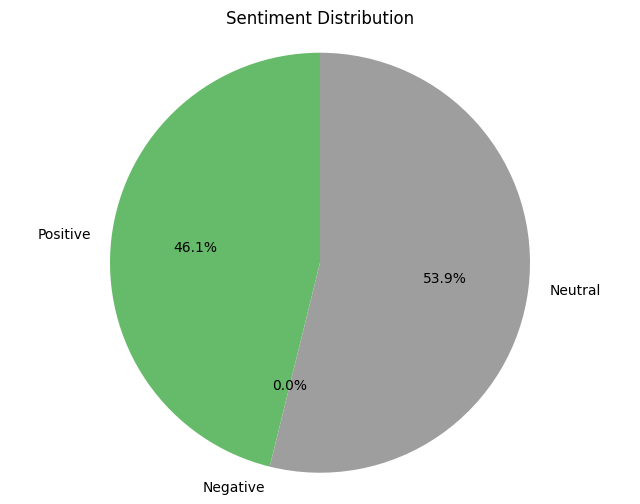

Overall Sentiment Scores:
{'positive': 46.149653807973706, 'negative': 0.0, 'neutral': 53.850346192026294}


In [7]:
# Example usage
url = 'https://www.goodreads.com/book/show/210563323-speechless'
sentiment_results = analyze_book_reviews(url, top_n=20)

if sentiment_results:
    print("Overall Sentiment Scores:")
    print(sentiment_results)

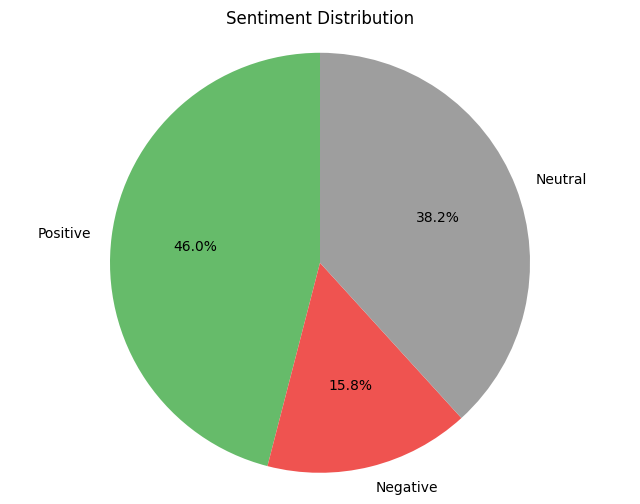

Overall Sentiment Scores:
{'positive': 45.97526990617201, 'negative': 15.781464861706759, 'neutral': 38.24326523212124}


In [8]:
# Example usage
url = 'https://www.goodreads.com/book/show/58613451-harry-potter-and-the-order-of-the-phoenix'
sentiment_results = analyze_book_reviews(url, top_n=20)

if sentiment_results:
    print("Overall Sentiment Scores:")
    print(sentiment_results)

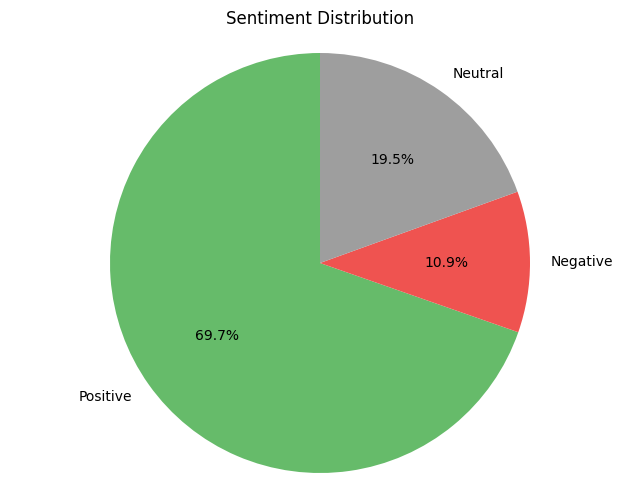

Overall Sentiment Scores:
{'positive': 69.65334133839103, 'negative': 10.86227729893674, 'neutral': 19.484381362672224}


In [9]:
# Example usage
url = 'https://www.goodreads.com/book/show/52892857-the-color-purple'
sentiment_results = analyze_book_reviews(url, top_n=20)

if sentiment_results:
    print("Overall Sentiment Scores:")
    print(sentiment_results)

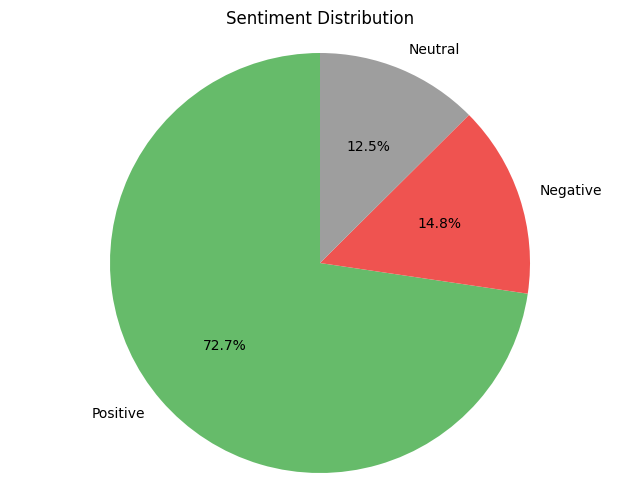

Overall Sentiment Scores:
{'positive': 72.663989868435, 'negative': 14.787946942833576, 'neutral': 12.548063188731437}


In [10]:
# Example usage
url = 'https://www.goodreads.com/book/show/2767052-the-hunger-games?from_search=true&from_srp=true&qid=JTtDu79JCL&rank=1'
sentiment_results = analyze_book_reviews(url, top_n=20)

if sentiment_results:
    print("Overall Sentiment Scores:")
    print(sentiment_results)


## **Disclaimer: I do not own any of this data.**